In [2]:
import numpy as np
import gzip

# load training images
with gzip.open('data_fashion_mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    X_train = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load testing images
with gzip.open('data_fashion_mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    X_test = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28*28)

# load training labels
with gzip.open('data_fashion_mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    y_train = np.frombuffer(f.read(), np.uint8, offset=8)
    
# load testing labels
with gzip.open('data_fashion_mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    y_test = np.frombuffer(f.read(), np.uint8, offset=8)
    

# check data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# data normalization

X_train = X_train/255
X_test  = X_test/255

In [4]:
import tensorflow as tf
import tensorflow.keras as keras

# create model
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [5]:
# optimizer and loss
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['sparse_categorical_accuracy'])

# training
history = model.fit(X_train, y_train, 256, epochs=50, verbose=2)

# testing
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/50
235/235 - 1s - loss: 1.6284 - sparse_categorical_accuracy: 0.5769 - 588ms/epoch - 3ms/step
Epoch 2/50
235/235 - 0s - loss: 0.9705 - sparse_categorical_accuracy: 0.8007 - 376ms/epoch - 2ms/step
Epoch 3/50
235/235 - 0s - loss: 0.7672 - sparse_categorical_accuracy: 0.8327 - 399ms/epoch - 2ms/step
Epoch 4/50
235/235 - 0s - loss: 0.6678 - sparse_categorical_accuracy: 0.8478 - 327ms/epoch - 1ms/step
Epoch 5/50
235/235 - 0s - loss: 0.6076 - sparse_categorical_accuracy: 0.8566 - 327ms/epoch - 1ms/step
Epoch 6/50
235/235 - 0s - loss: 0.5665 - sparse_categorical_accuracy: 0.8629 - 331ms/epoch - 1ms/step
Epoch 7/50
235/235 - 0s - loss: 0.5365 - sparse_categorical_accuracy: 0.8673 - 331ms/epoch - 1ms/step
Epoch 8/50
235/235 - 0s - loss: 0.5134 - sparse_categorical_accuracy: 0.8710 - 318ms/epoch - 1ms/step
Epoch 9/50
235/235 - 0s - loss: 0.4949 - sparse_categorical_accuracy: 0.8743 - 324ms/epoch - 1ms/step
Epoch 10/50
235/235 - 0s - loss: 0.4797 - sparse_categorical_accuracy: 0.8764 - 33

Text(0, 0.5, 'Loss')

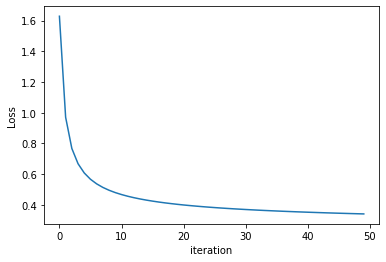

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('iteration')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

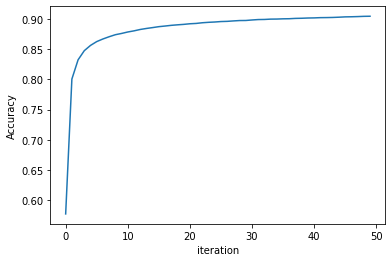

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.xlabel('iteration')
plt.ylabel('Accuracy')